In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('data .csv')


In [2]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [0]:
del data['Unnamed: 32']

In [0]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

In [0]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(26, activation='relu', input_dim=30))
# Adding dropout to prevent overfitting
classifier.add(Dropout(0.1))
# Adding the second hidden layer
classifier.add(Dense(13,  activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(0.1))
classifier.add(Dense(6, activation='relu'))

classifier.add(Dropout(0.1))
classifier.add(Dense(3, activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(0.1))
classifier.add(Dense(1,  activation='sigmoid'))
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=10, nb_epoch=181,shuffle=True)
# Long scroll ahead but worth
# The batch size and number of epochs have been set using trial and error. Still looking for more efficient ways. Open to suggestions.



Epoch 1/181
512/512 [==============================] - 1s 986us/sample - loss: 0.6670 - acc: 0.4434
Epoch 2/181
512/512 [==============================] - 0s 220us/sample - loss: 0.5533 - acc: 0.7754
Epoch 3/181
512/512 [==============================] - 0s 224us/sample - loss: 0.4994 - acc: 0.8633
Epoch 4/181
512/512 [==============================] - 0s 188us/sample - loss: 0.4756 - acc: 0.9180
Epoch 5/181
512/512 [==============================] - 0s 197us/sample - loss: 0.4462 - acc: 0.9277
Epoch 6/181
512/512 [==============================] - 0s 234us/sample - loss: 0.4263 - acc: 0.9570
Epoch 7/181
512/512 [==============================] - 0s 194us/sample - loss: 0.4077 - acc: 0.9512
Epoch 8/181
512/512 [==============================] - 0s 201us/sample - loss: 0.3836 - acc: 0.9629
Epoch 9/181
512/512 [==============================] - 0s 220us/sample - loss: 0.3647 - acc: 0.9707
Epoch 10/181
512/512 [==============================] - 0s 198us/sample - loss: 0.3656 - acc: 0.9551

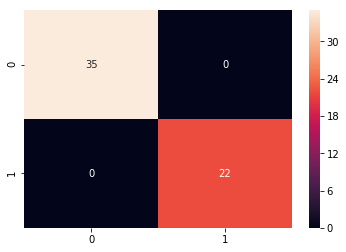

In [12]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        22

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



In [16]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))


Our accuracy is 100.0%
